In [46]:
# Importing the libraries for exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Loading the dataset
dataset=pd.read_csv('diamonds.csv')

In [48]:
# Examining the preview of the dataset
dataset.sample(n=5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
35001,35002,0.42,Premium,G,SI1,60.6,62.0,882,4.85,4.82,2.93
14361,14362,1.01,Very Good,D,SI1,61.6,59.0,5815,6.42,6.47,3.97
43518,43519,0.61,Ideal,F,SI2,61.3,55.0,1424,5.47,5.55,3.38
28938,28939,0.30,Very Good,G,VVS2,62.9,55.0,684,4.30,4.32,2.71
50163,50164,0.70,Good,H,SI1,63.7,59.0,2218,5.53,5.59,3.54


In [49]:
# Dropping the first column since it is just an index counter
dataset=dataset.drop(dataset.columns[0],axis=1)

In [50]:
# Gathering information about the null values and dtypes of variables
dataset.info()
# No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [51]:
# Checking for duplicate observations
dataset.duplicated().sum()

146

In [52]:
# Examining duplicate observations
dataset[dataset.duplicated()]
# Duplicates are just a fraction of the whole data set and they are different from one another - there is no need to do anything about them

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [53]:
# Examining basic descriptive statistics data
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [54]:
# Counting suspicious observations with 'x'=0,'y'=0 and/or 'z'=0 (diamonds are 3 dimensional objects)
print(dataset[(dataset['x']==0)|(dataset['y']==0)|(dataset['z']==0)].shape[0])

20


In [55]:
# Removing the rows with 'x'=0,'y'=0 and/or 'z'=0, becuse they are merely a fraction of the whole dataset
dimensions=['x','y','z']
for n in dimensions:
    dataset=dataset.drop(dataset[dataset[n]==0].index)
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


In [56]:
# Examining categorical data distribution and relation to target variable
dataset1=dataset.copy()
cats=['cut','color','clarity']
# Mapping the categorical variables from worst (1) to best (n)
maps=[{'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5},
{'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1},
{'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}]
for n in cats:
    dataset1[n]=dataset1[n].map(maps[cats.index(n)])

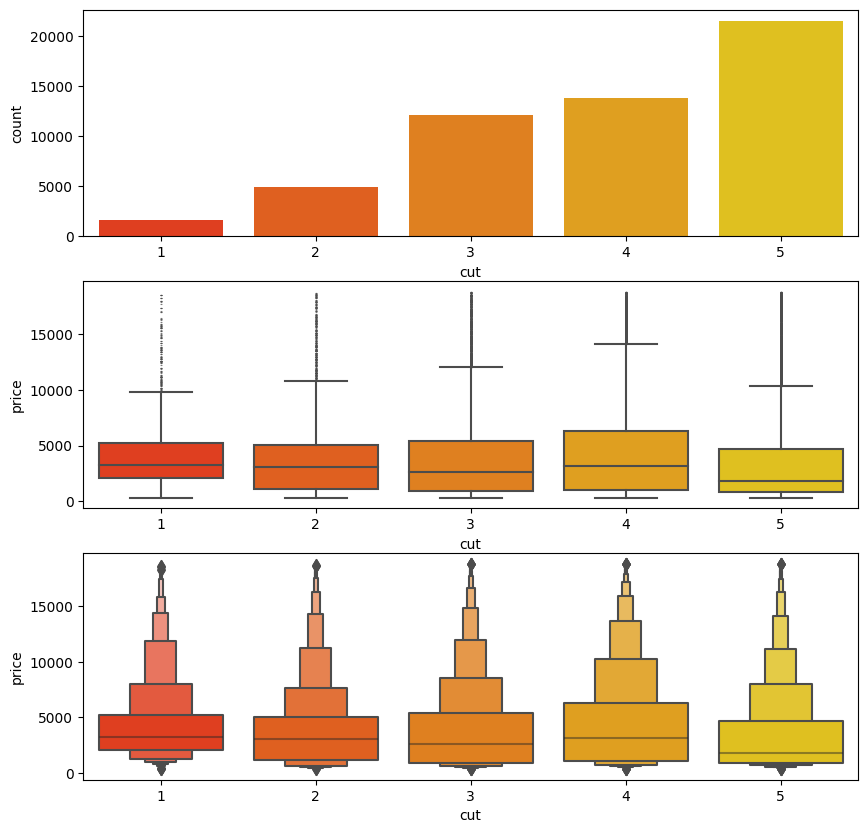

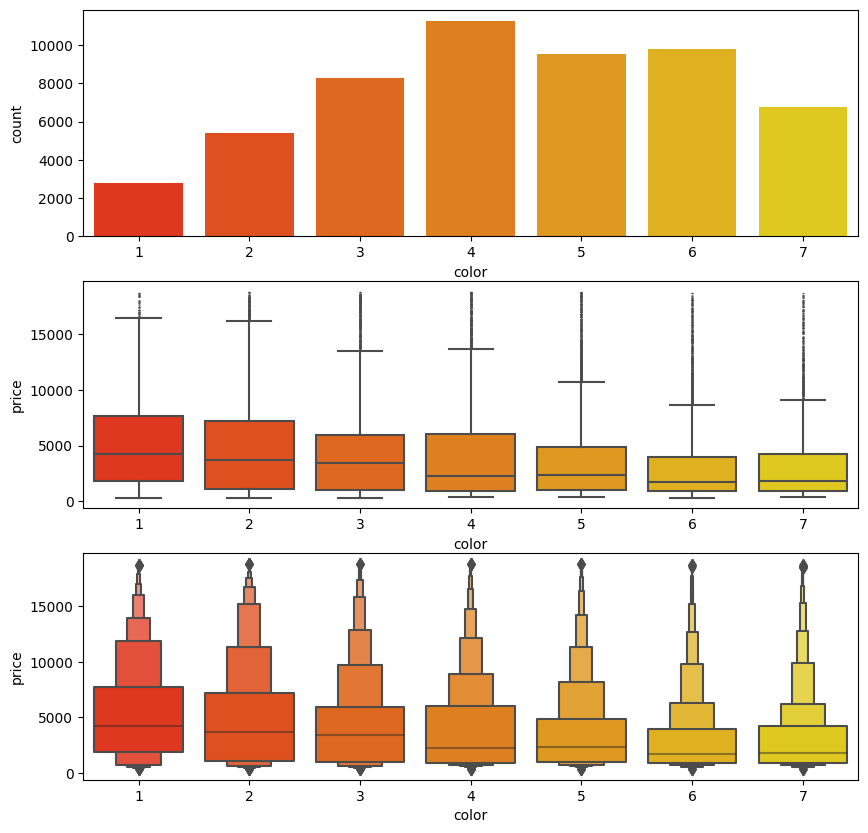

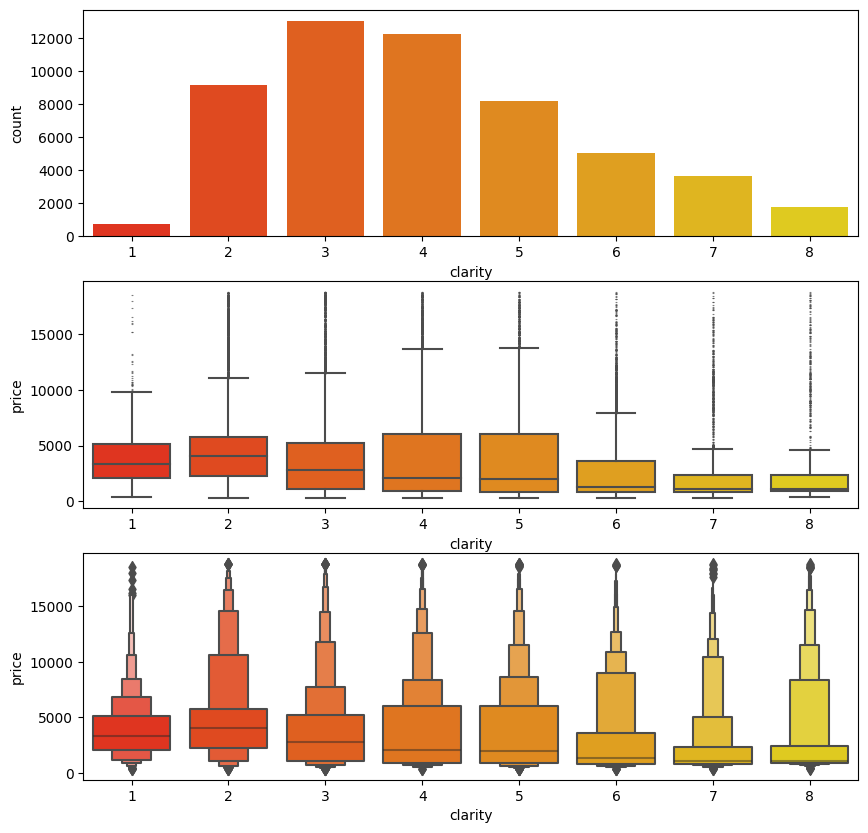

In [57]:
for n in cats:
    cat_plot=plt.figure(figsize=(10,10))
    ax1=cat_plot.add_subplot(3,1,1)
    sns.countplot(data=dataset1,x=n,palette='autumn',ax=ax1)
    ax2=cat_plot.add_subplot(3,1,2)
    sns.boxplot(data=dataset1,x=n,y='price',palette='autumn',fliersize=0.2,ax=ax2)
    ax3=cat_plot.add_subplot(3,1,3)
    sns.boxenplot(data=dataset1,x=n,y='price',palette='autumn',ax=ax3)
    plt.show()

In [58]:
# Examining numerical data
nums=list(dataset.select_dtypes(include=['float64','int64']).columns)
nums.remove('price')

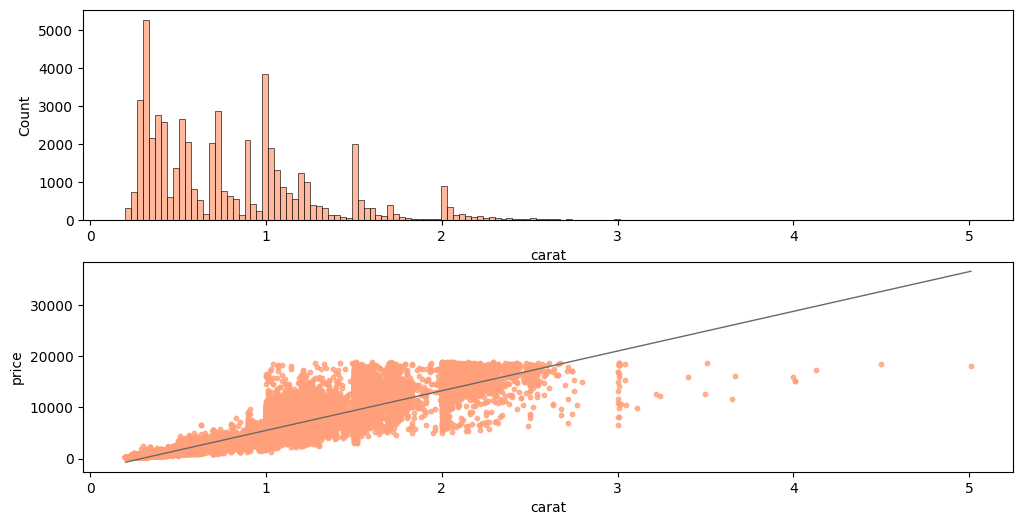

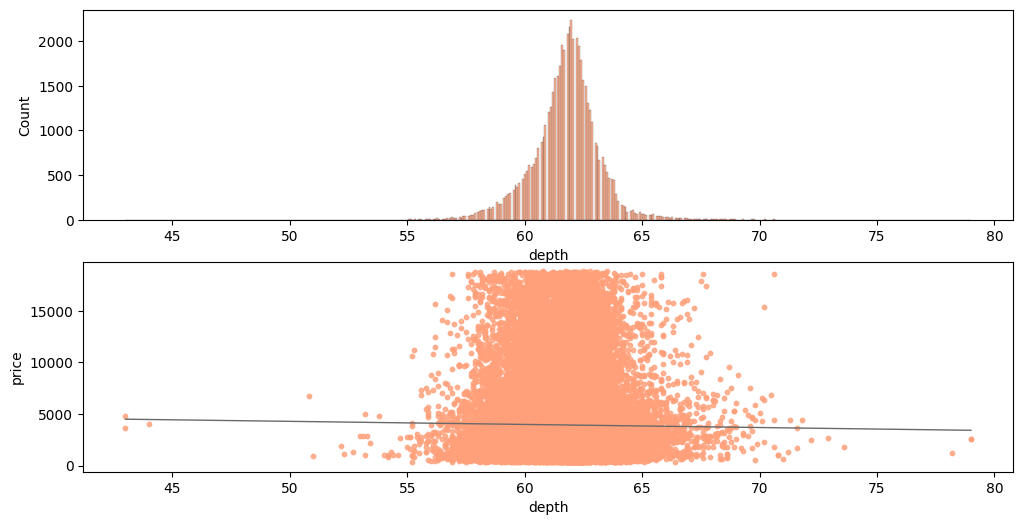

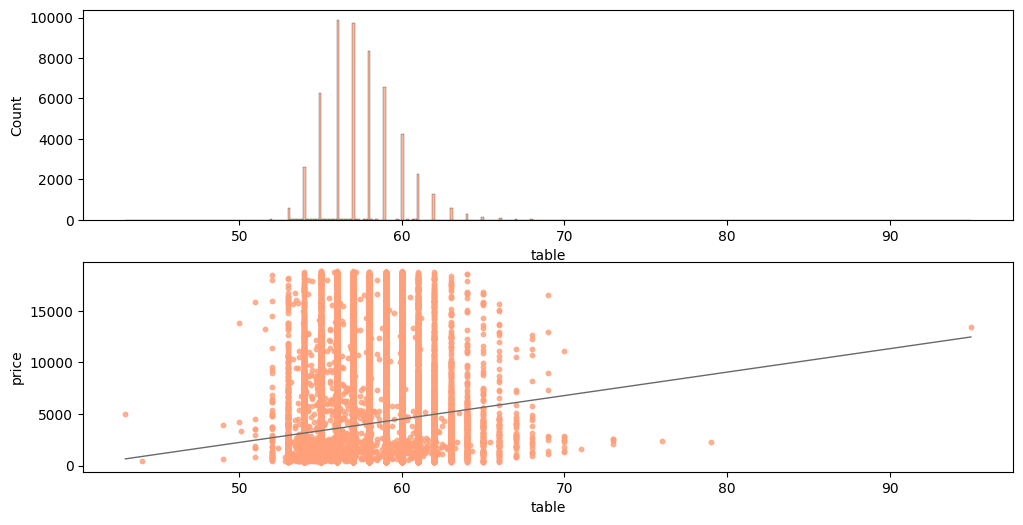

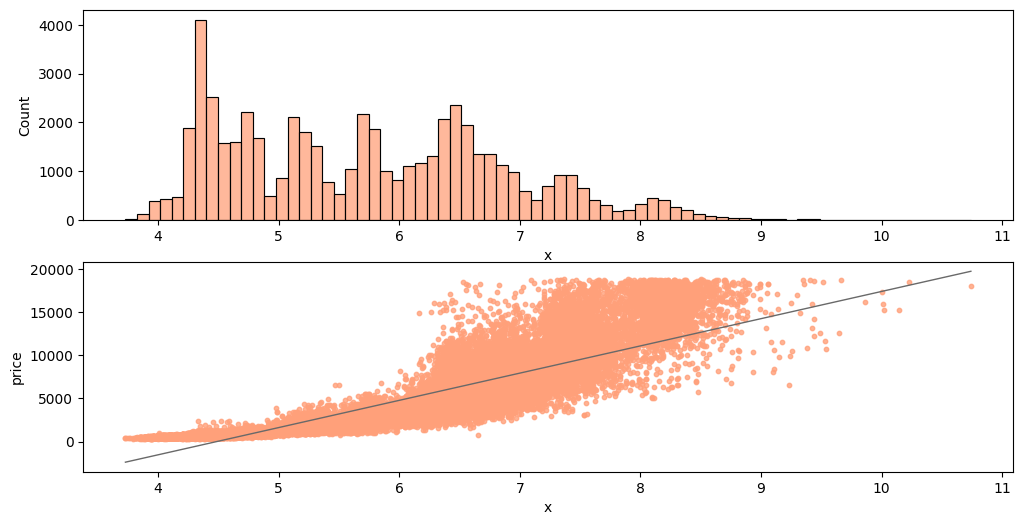

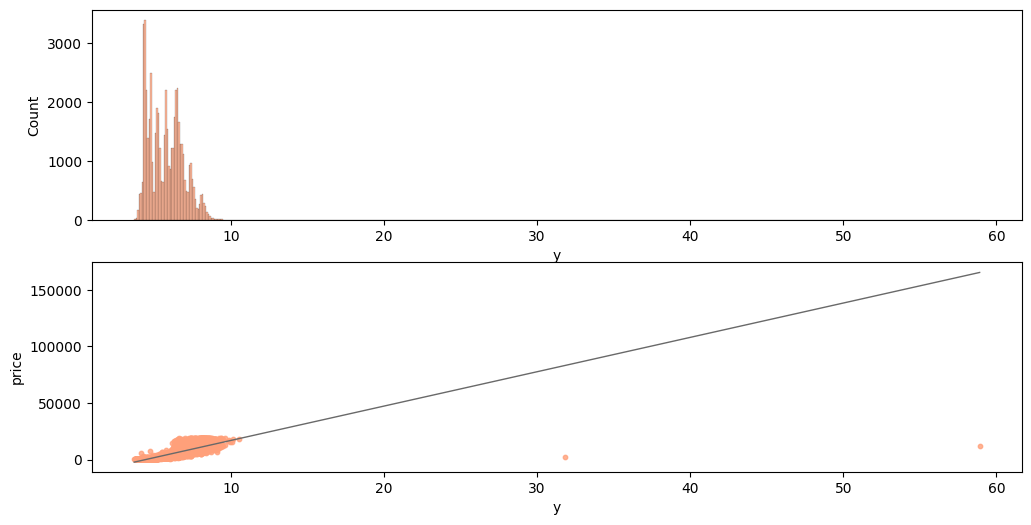

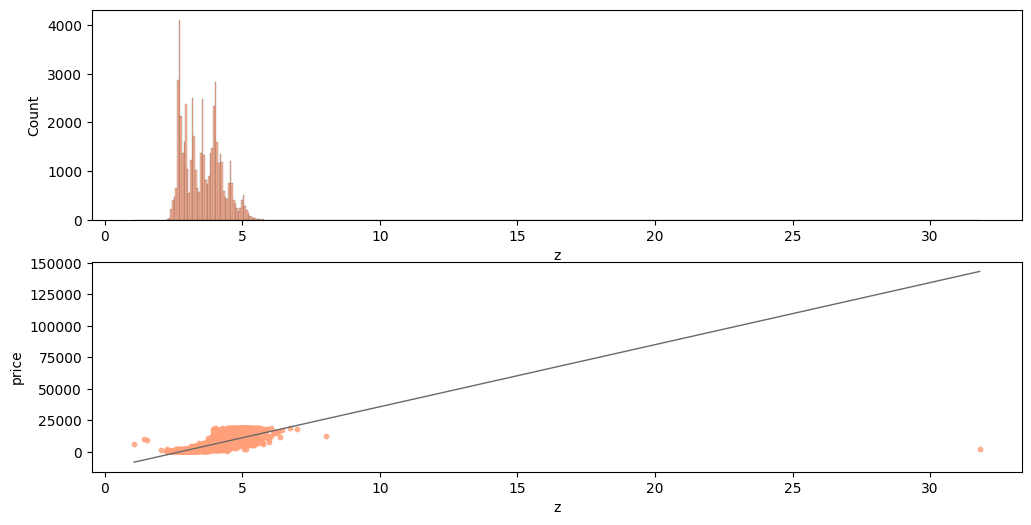

In [59]:
for n in nums:
    num_plot=plt.figure(figsize=(12,6))
    ax1=num_plot.add_subplot(2,1,1)
    sns.histplot(dataset,x=n,color='lightsalmon',ax=ax1)
    ax1=num_plot.add_subplot(2,1,2)
    sns.regplot(x=n,y='price', data=dataset,ci=0,scatter_kws={'s':10,'color':'lightsalmon'},line_kws={'lw':1,'color':'dimgrey'})
    plt.show()

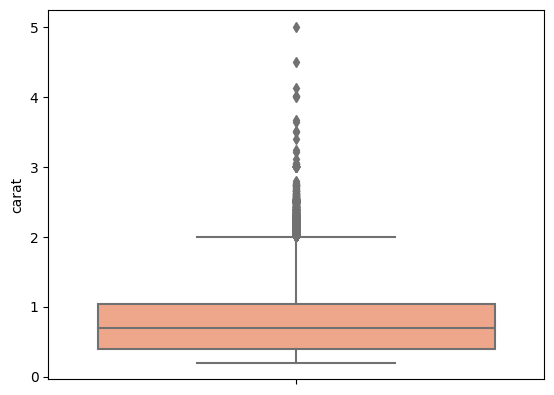

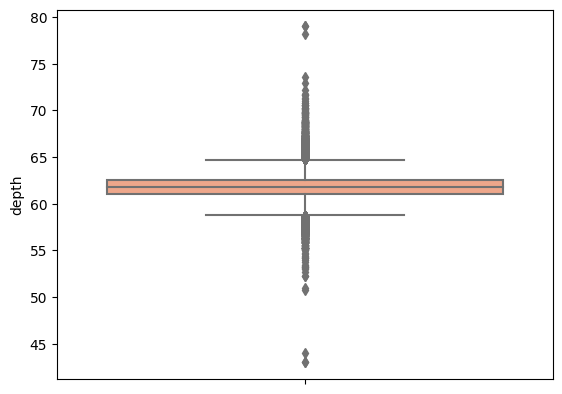

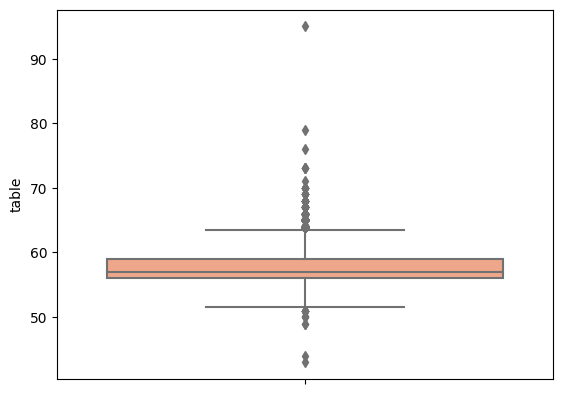

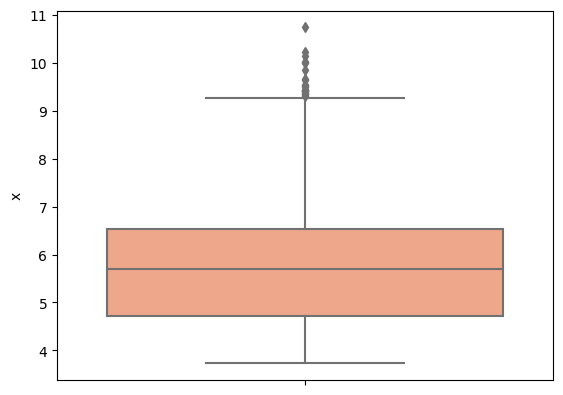

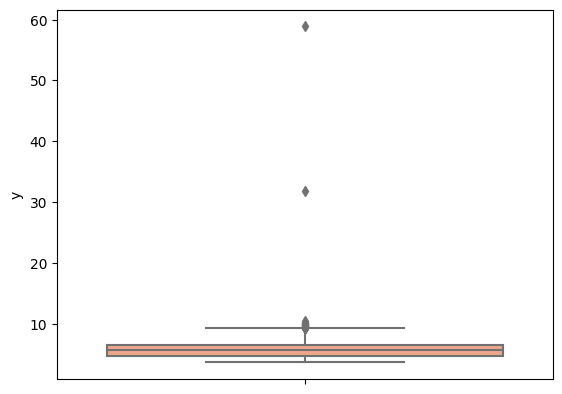

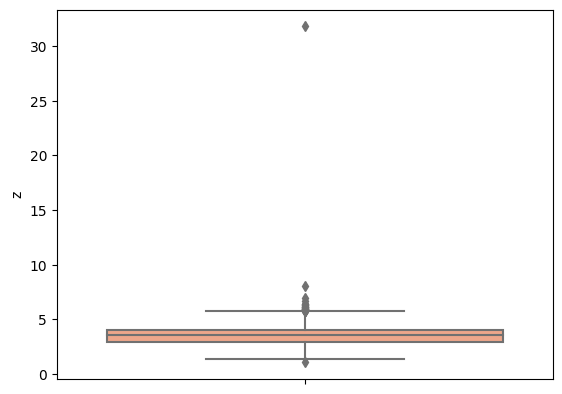

In [60]:
# Examining the outliers
for n in nums:
    box=sns.boxplot(y=dataset[n],color='lightsalmon')
    plt.show()


In [61]:
# Removing the most extreme (most unlikely) outliers
dataset=dataset[dataset['carat']<4.2]
dataset=dataset[(dataset['depth']>50)&(dataset['depth']<75)]
dataset=dataset[(dataset['table']>48)&(dataset['table']<75)]
dataset=dataset[dataset['y']<15]
dataset=dataset[(dataset['z']>2)&(dataset['z']<10)]

<AxesSubplot: >

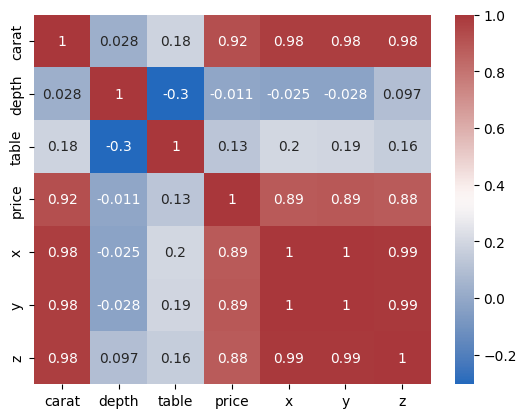

In [62]:
# Examining correlations between variables
sns.heatmap(dataset.corr(numeric_only=True),cmap='vlag',annot=True)

<AxesSubplot: >

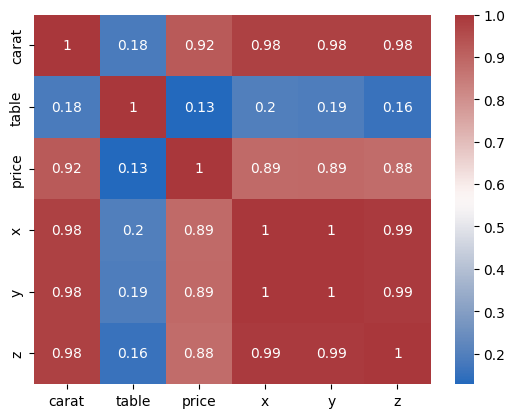

In [63]:
# 'depth' is hardly correlated with 'price' and all the features, therefore it should be dropped
dataset=dataset.drop('depth',axis=1)
sns.heatmap(dataset.corr(numeric_only=True),cmap='vlag',annot=True)

In [64]:
# Encoding (mapping) categorical variables and adding them into the correlation heatmap
for n in cats:
    dataset[n]=dataset[n].map(maps[cats.index(n)])

<AxesSubplot: >

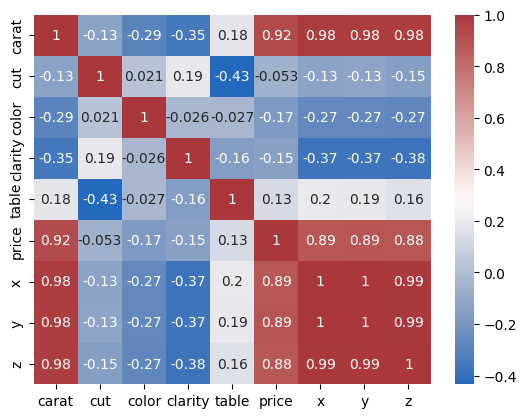

In [65]:
# Examining correlation between variables
sns.heatmap(dataset.corr(),cmap='vlag',annot=True)

In [66]:
# Splitting the dataset into features and dependent variable dataframes
X=dataset.drop('price',axis=1)
y=dataset['price']

In [67]:
# Performing the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [68]:
# Since the predicted value is numerical and categorical features are present, the two regressors to try out are Random Forest and Gradient Boosting Tree
# No feature scaling is required because both methods are based on Decision Trees
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
xgb=XGBRegressor()
rf=RandomForestRegressor()

In [69]:
# Fitting the regressors
xgb.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
# Random Forest mean squared error score
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(rf,X_train,y_train,scoring='neg_mean_squared_error')
print(score_rf.mean())

-302875.14822619327


In [71]:
# Gradient Boosting Tree mean squared error score
score_xgb=cross_val_score(xgb,X_train,y_train,scoring='neg_mean_squared_error')
print(score_xgb.mean())

-297681.536397467


In [72]:
# Predicting with the highest score regressor
y_pred=xgb.predict(X_test)

In [73]:
# Measuring the accuracy of the model
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.9812114112030714
